# Исследование влияния батча на целевую функцию классификатора

Сгенерируем некоторый набор данных с двумя классами. Для него сформируем простой линейный классификатор, веса которого сможем легко изменять посмторим как функция кросс энтропии будет себя вести. 

In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os
from sys import path

exec_str = os.getcwd()[:os.getcwd().find('prog')+len('prog')]
if not exec_str in path:
    path.append(exec_str)
    print('exec added to path')
from DS_common import visualisations

exec added to path


# Подготовка метода для формирования данных

Будет две двумерные-нормальные случайные величины. С настройками близости и дисперсии.

In [2]:
def create_exmaple_data(
    distance, sigma, 
    class0_count = 200, 
    class1_count = 200
):
    pos = distance/(2*sqrt(np.abs(distance)))
    data =\
    np.concatenate([
        np.concatenate([
            np.random.normal(pos, sigma, [class0_count, 2]),
            np.zeros([class0_count,1])
        ], axis = 1),
        np.concatenate([
            np.random.normal(-pos, sigma, [class1_count, 2]),
            np.ones([class1_count,1])
        ],axis = 1)
    ])
    
    return data

Нанести диаграмму рассеяния

In [3]:
def plot_scatter(
    data
):
    for level in np.unique(data[:, 2]):
        cond = (data[:,2] == level)
        plt.scatter(data[cond,0], data[cond,1], label = level)
    
    plt.xlabel('$x_1$', loc = 'right', fontsize = 14)
    plt.ylabel('$x_2$', loc = 'top', fontsize = 14)

Примерить линейный классификатор с преданными весами - идентификационная форма логистическая регрессия.

In [4]:
def linear_classy_pred(w1, w2, X1, X2):
    # output - np.array - вектор предсказаний модели
    return 1/(1+np.exp(-np.cos(w1)*X1 - np.sin(w1)*X2 + w2))

Вычисление функци кросс-энропии

In [5]:
def cross_entropy_fun(y,p):
    return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))

Для указанный множеств весов подготовить сетку и значения ошибки

In [6]:
def get_losses(w1, w2, data):

    ww1, ww2 = np.meshgrid(w1, w2)
    losses = np.zeros(ww1.shape)

    for i in range(ww1.shape[0]):
        for j in range( ww1.shape[1]):
            preds = linear_classy_pred(
                ww1[i,j], ww2[i,j], 
                data[:,0], data[:,1]
            )
            losses[i,j] = cross_entropy_fun(data[:, 2], preds)
            
    return ww1, ww2, losses

 Для полученных данных и парамеров логита сформирвоать диаграмму рассеяния и тупловую карту высот

In [7]:
def temp_f(
    w1, w2, data,
    title_settings = {
        'fontsize':14
    },
    labels_settings = {
        'fontsize':14
    }
):
    
    x1_max = np.max(data[:, 0])
    x1_min = np.min(data[:, 0])
    x2_max = np.max(data[:, 1])
    x2_min = np.min(data[:, 1])

    
    l_mesh_x, l_mesh_y = np.meshgrid(
        np.linspace(x1_min, x1_max, 50),
        np.linspace(x2_min, x2_max, 50)
    )

    plt.contourf(
        l_mesh_x, l_mesh_y, 
        linear_classy_pred(w1, w2, l_mesh_x, l_mesh_y),
        levels = 50, cmap = 'inferno'
    )

    plot_scatter(data)
    plt.title(cross_entropy_fun(
        data[:,2],
        linear_classy_pred(
            w1, w2, data[:,0], data[:,1]
        )
    ), **title_settings)

# Вычисления

Создание данных

In [9]:
# data = create_exmaple_data(4, 1)
# #data = np.random 

# additional_data_size = 50
# additional_data_sigma = 0.5
# additional_data = \
# np.concatenate([
#     np.concatenate([
#         np.random.normal(4, additional_data_sigma, [additional_data_size,1]),
#         np.random.normal(3, additional_data_sigma, [additional_data_size,1])
#     ], axis = 1), 
#     np.ones([additional_data_size, 1])
# ], axis = 1)

# data = np.concatenate([
#     data, additional_data
# ])

# np.savetxt('nice_plot_data.csv', data, delimiter = ',')

data = np.genfromtxt('nice_plot_data.csv', delimiter = ',')

И достанем от туда батч

In [10]:
data_batch = data[np.random.randint(data.shape[0], size = int(data.shape[0]*0.1)),:]

Обшика в завимисоти от двух параметров

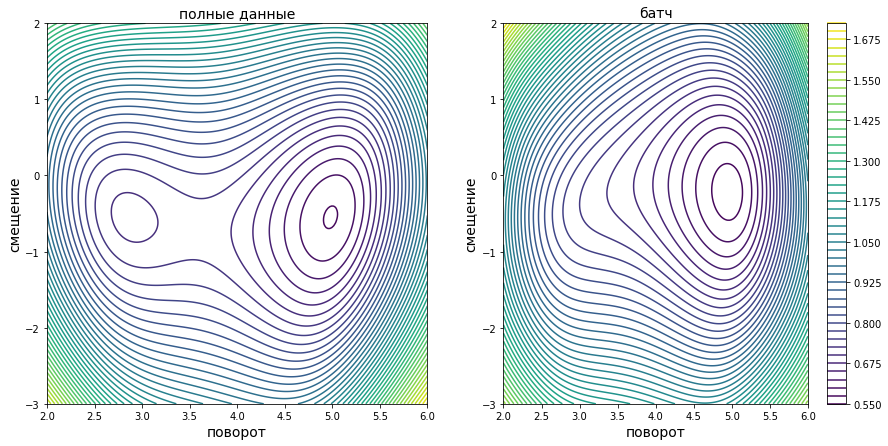

In [11]:
w1 = np.linspace(2, 6, 200)
w2 = np.linspace(-3, 2, 200)

plt.figure(figsize = [15,7])

fig = plt.subplot(121)
ww1, ww2, losses_1 = get_losses(w1, w2, data)
plt.contour(ww1, ww2, losses_1, levels = 50)
plt.xlabel('поворот', fontsize = 14)
plt.ylabel('смещение', fontsize = 14)
plt.title('полные данные', fontsize = 14)

plt.subplot(122)
ww1, ww2, losses_2 = get_losses(w1, w2, data_batch)
cont = plt.contour(ww1, ww2, losses_2, levels = 50)
plt.xlabel('поворот', fontsize = 14)
plt.ylabel('смещение', fontsize = 14)
plt.title('батч', fontsize = 14)

fig = plt.colorbar(cont)
plt.savefig('results/levels_plots.png')

## Смотрим как классификатор ложиться на подбранные параметры

Полные данные

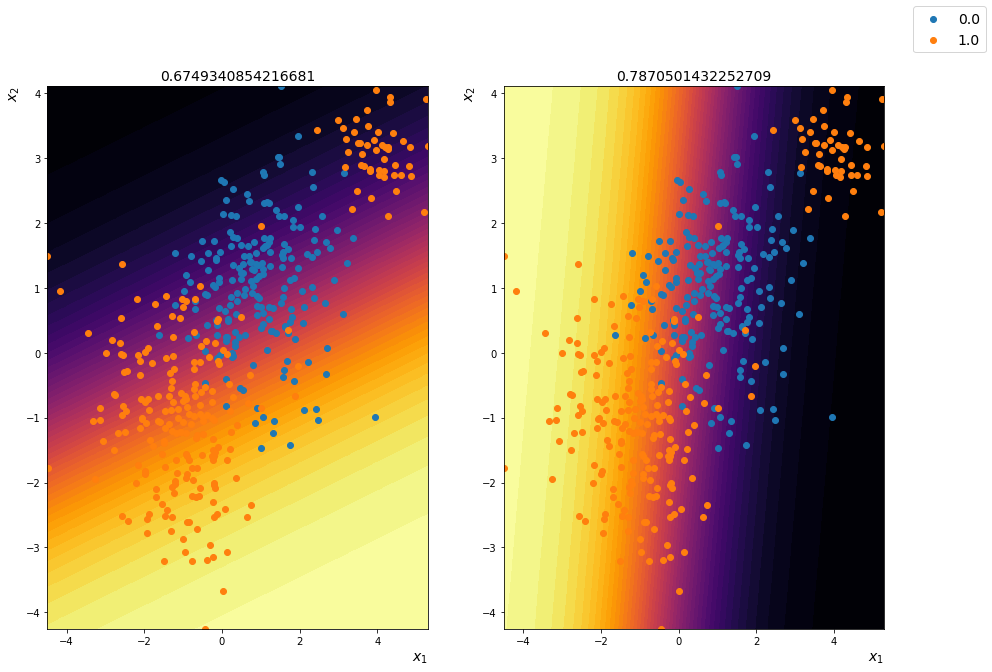

In [12]:
fig = plt.figure(figsize = [15,10])
plt.subplot(121)
temp_f(5, 0, data)
fig.legend(fontsize = 14)

plt.subplot(122)
temp_f(3, -0.1, data)

plt.savefig('results/full_distr.png')

Батч

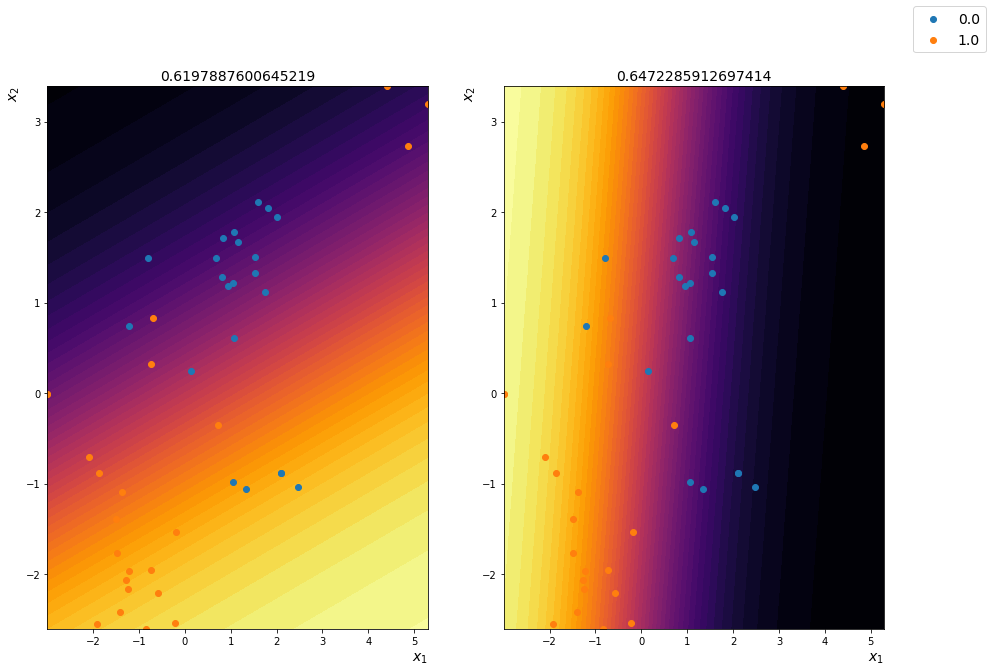

In [28]:
fig = plt.figure(figsize = [15,10])
plt.subplot(121)
temp_f(5, 0, data_batch)
fig.legend(fontsize = 14)

plt.subplot(122)
temp_f(3, -0.1, data_batch)

plt.savefig('results/batch_distr.png')